# DA Final project:

# Group 5

# Shark Attack

###  Name of students:
Ohad Rosenson<br>
Yoav Yekutiel<br>



<a id='top'></a>

<div>
<img src="https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/shark-swimming-water-1200x800.webp" width="500"/>
<div>


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Information of the data
The target of our project is to find details that affect shark attacks on people and to minimize these attacks. <br>taken from [Kaggle](https://www.kaggle.com/datasets/felipeesc/shark-attack-dataset)


In [49]:
url1 = 'https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/sharck_attack_part_2UPD.csv'#כשפיצלנו את הקובץ , לאחר הפיצול נשארו בקובץ המון שורות ריקות ולכן יצרנו משתנה חדש שבו מצויות רק שורות עם נתונים
df = pd.read_csv(url1)
shark_df2 = df.iloc[:2809]
url2 = 'https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/sharck_attack_part_1UPD.csv'
shark_df1 = pd.read_csv(url2)
shark_df = pd.concat([shark_df1 ,shark_df2]).reset_index()#כעת נחבר את הקבצים, מאחר ואנחנו רוצים לעבוד באותו סדר שבו עבדו בקובץ , נרצה שההתחלה של הקובץ יהיו השנים המעודכנות ואילו בסוף יהיו השנים המאוחרות
shark_df.shape

(6309, 25)

In [51]:
shark_df.columns


Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [52]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   6309 non-null   int64  
 1   Case Number             6308 non-null   object 
 2   Date                    6302 non-null   object 
 3   Year                    6300 non-null   float64
 4   Type                    6298 non-null   object 
 5   Country                 6252 non-null   object 
 6   Area                    5847 non-null   object 
 7   Location                5762 non-null   object 
 8   Activity                5758 non-null   object 
 9   Name                    6092 non-null   object 
 10  Sex                     5737 non-null   object 
 11  Age                     3471 non-null   object 
 12  Injury                  6274 non-null   object 
 13  Fatal (Y/N)             5763 non-null   object 
 14  Time                    2948 non-null   

# Arranging the columns so the relevant data is displayed in each column 

In [140]:
counts_of_each_activity = shark_df['Activity'].value_counts() #סידור מחדש עבור activity
frequent_activities = counts_of_each_activity[counts_of_each_activity >= 50].index
shark_df['Frequent_Activity'] = shark_df['Activity'].apply(lambda x: x if x in frequent_activities else pd.NA) # יצירת עמודה חדשה שבה מצויים כלל הפעילויות שמופיעות מעל 50 פעם בdata
shark_df['Frequent_Activity'].unique()
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Scuba diving': 'Diving','Snorkeling': 'Diving'}) #איחוד המשתנים כך שכל סוגי הצלילה ייכנסו תחת הקבוצה של הצלילה הכולל
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Spearfishing':'Fishing'})
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Body boarding':'Surfing'})
shark_df['Frequent_Activity'].unique()

array([<NA>, 'Standing', 'Surfing', 'Swimming', 'Fishing', 'Diving',
       'Wading', 'Bathing'], dtype=object)

In [141]:
counts_of_species= shark_df['Species '].value_counts() # סידור עמודת Species
frequent_species = counts_of_species[counts_of_species >= 10].index
shark_df['Species'] = shark_df['Species '].apply(lambda x: x if x in frequent_species else pd.NA)
shark_df['Species'] = shark_df['Species'].apply(lambda x: 'Shark involvement not confirmed' if pd.notnull(x) and 'confirmed' in x else x)
shark_df['Species'] = shark_df['Species'].apply(lambda x: 'white shark' if pd.notnull(x) and 'hite' in x else x)
shark_df['Species'] = shark_df['Species'].replace({"Questionable":"Questionable incident"})
shark_df['Species'].unique()

array(['white shark', <NA>, '2 m shark', 'Tiger shark',
       'Shark involvement not confirmed', 'Questionable incident',
       '3 m shark', "6' shark", 'Bull shark', 'Wobbegong shark',
       'Blacktip shark', "5' shark", "4' to 5' shark", 'Nurse shark',
       "4' shark", "3' shark", "10' shark", "3' to 4' shark", 'Invalid',
       'Blue shark', 'Mako shark', 'No shark involvement', '1.5 m shark',
       "7' shark", 'Grey nurse shark', 'Raggedtooth shark',
       'Zambesi shark', 'Bronze whaler shark', '"a small shark"',
       "12' shark", "1.8 m [6'] shark", "3 m [10'] shark",
       "2.4 m [8'] shark", "1.2 m [4'] shark",
       "1.2 m to 1.5 m [4' to 5'] shark", "1.5 m [5'] shark",
       "3.7 m [12'] shark"], dtype=object)

In [64]:
shark_df['Fatal (Y/N)'] = shark_df['Fatal (Y/N)'].replace({" N":"N","y":"Y"}) # סידור fatal 
counts_of_fatal_incident = shark_df["Fatal (Y/N)"].value_counts()
fatal_incident = counts_of_fatal_incident[counts_of_fatal_incident >= 10].index
fatal_incident
shark_df['fatal_incident'] = shark_df['Fatal (Y/N)'].apply(lambda x: x if x in fatal_incident else pd.NA)
shark_df['fatal_incident'] = shark_df['fatal_incident'].replace('UNKNOWN', pd.NA)

shark_df['fatal_incident'].unique()

array(['N', 'Y', <NA>], dtype=object)

In [76]:
shark_df['Sex'] = shark_df['Sex '].replace('M ', 'M')
shark_df['Sex'] = shark_df['Sex '].map({'M':'M','F':'F'})
shark_df['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [70]:
top_15 = shark_df['Country'].value_counts().head(15)
shark_df['Top_Country'] = shark_df['Country'].apply(lambda x: x if x in top_15.index else None)
shark_df['Top_Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', None, 'SOUTH AFRICA',
       'BAHAMAS', 'NEW CALEDONIA', 'CUBA', 'NEW ZEALAND', 'REUNION',
       'PHILIPPINES', 'MOZAMBIQUE', 'FIJI', 'ITALY', 'PAPUA NEW GUINEA'],
      dtype=object)

In [222]:
shark_df['D_Time'] = shark_df['Time'].str.replace('h', ':', regex=False)
shark_df['D_Time'] = pd.to_datetime(shark_df['D_Time'], format='%H:%M', errors='coerce')
shark_df['Time_Category'] = pd.cut(shark_df['D_Time'].dt.hour, bins=[0, 12, 18, 24], labels=['Morning', 'Noon', 'evening'], right=False)
shark_df['Time_Category'] .unique()

['evening', NaN, 'Morning', 'Noon']
Categories (3, object): ['Morning' < 'Noon' < 'evening']

In [80]:
shark_df['Injury_Types'] = shark_df['Injury'].apply(lambda x: 'bite' if pd.notnull(x) and 'bit' in x else ('No injury' if pd.notnull(x) and 'No injury' in x else x))
top_Injury= shark_df['Injury_Types'].value_counts().head(20).index
shark_df['Top_Injury'] = shark_df['Injury_Types'].apply(lambda x: x if x in top_Injury else 'NON')
shark_df['Top_Injury'].unique()


array(['No injury', 'NON', 'bite', 'FATAL', 'Lacerations to left foot',
       'Minor injuries', 'Lacerations to right foot',
       'Lacerations to foot', 'Leg injured', 'Laceration to left foot',
       'Lacerations to right hand', 'Lacerations to leg', 'Minor injury',
       'No details', 'Leg severed', 'Survived', 'Foot severed',
       'Foot lacerated', 'FATAL, leg severed ',
       'FATAL, body not recovered', 'Leg lacerated'], dtype=object)

In [175]:

shark_df['Date'] = pd.to_datetime(shark_df['Date'], errors='coerce')
shark_df['Month'] = shark_df['Date'].dt.month
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
shark_df['Month'] = shark_df['Month'].map(month_map)
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
shark_df['Month'] = pd.Categorical(shark_df['Month'], categories=months_order, ordered=True)
shark_df['Month'].unique()


['June', 'May', NaN, 'April', 'March', ..., 'November', 'October', 'September', 'August', 'July']
Length: 13
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [137]:
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')
shark_df['age_bins'] = pd.cut(shark_df['Age'], bins = 3, labels = ('young', 'middle_age', 'old' ))
shark_df['age_bins'].value_counts()

age_bins
young         2189
middle_age    1065
old            115
Name: count, dtype: int64

In [179]:
shark_df.columns

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23', 'Species', 'fatal_incident', 'Sex',
       'Top_Country', 'Injury_Types', 'Top_Injury', 'Month', 'age_bins',
       'Frequent_Activity'],
      dtype='object')

###First Conclusion:

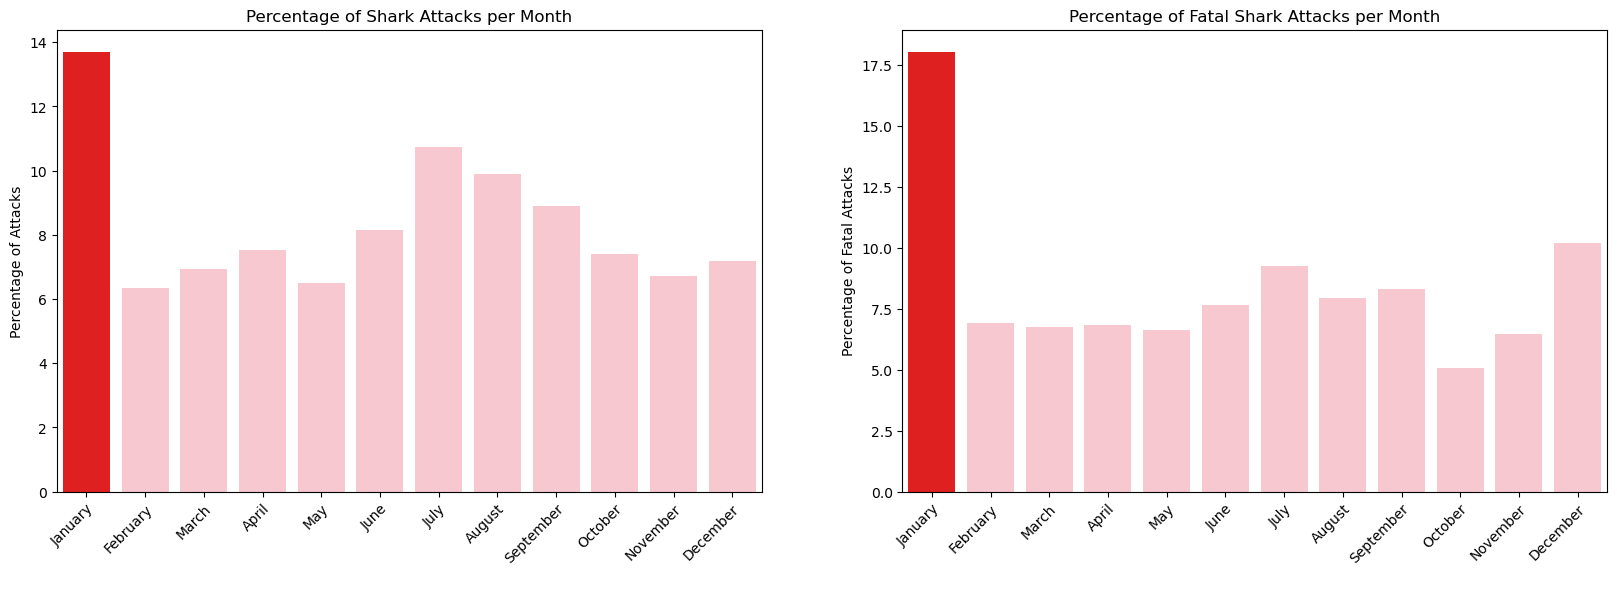

In [268]:

attack_counts = shark_df.groupby('Month').size()
attack_percentages = (attack_counts / attack_counts.sum()) * 100
attack_percentages = attack_percentages.reindex(months_order)

fatal_counts = shark_df[shark_df['Fatal (Y/N)'] == 'Y'].groupby('Month').size()
fatal_percentages = (fatal_counts / fatal_counts.sum()) * 100
fatal_percentages = fatal_percentages.reindex(months_order)

colors_attack = ['red' if month == 'January' else 'pink' for month in attack_percentages.index]
colors_fatal = ['red' if month == 'January' else 'pink' for month in fatal_percentages.index]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.subplots_adjust(wspace=0.2)

sns.barplot(x=attack_percentages.index, y=attack_percentages.values, palette=colors_attack, ax=ax[0])
ax[0].set_title('Percentage of Shark Attacks per Month')
ax[0].set_xlabel(' ')
ax[0].set_ylabel('Percentage of Attacks')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

sns.barplot(x=fatal_percentages.index, y=fatal_percentages.values, palette=colors_fatal, ax=ax[1])
ax[1].set_title('Percentage of Fatal Shark Attacks per Month')
ax[1].set_xlabel(' ')
ax[1].set_ylabel('Percentage of Fatal Attacks')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.show()


In [29]:
shark_df['Top_Country'].value_counts()

Top_Country
USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
Name: count, dtype: int64

In [30]:
shark_df['Location'].value_counts()

Location
New Smyrna Beach, Volusia County                  163
Daytona Beach, Volusia County                      30
Ponce Inlet, Volusia County                        20
Melbourne Beach, Brevard County                    18
Myrtle Beach, Horry County                         17
                                                 ... 
Whale Beach                                         1
l'Anse-Vata                                         1
Hole-in-the Wall                                    1
Wreck of the Navy Barge, 22 miles SE of Rudee       1
Below the English fort, Trincomalee                 1
Name: count, Length: 4108, dtype: int64

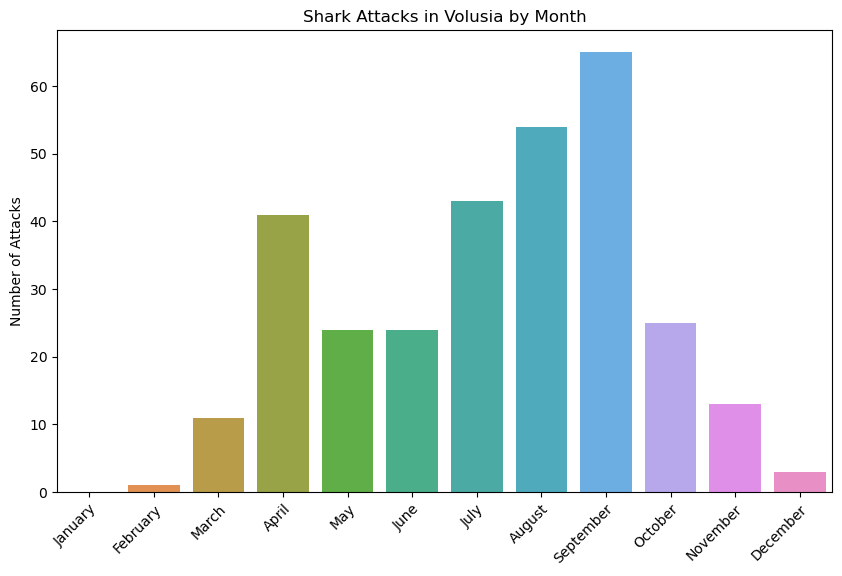

In [178]:
filtered_data = shark_df[shark_df['Location'].str.contains('Volusia', na=False)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Month', ax=ax)

# כותרות לצירים ולגרף
ax.set_title('Shark Attacks in Volusia by Month')
ax.set_xlabel('')
ax.set_ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor' )
# הצגת הגרף
plt.show()

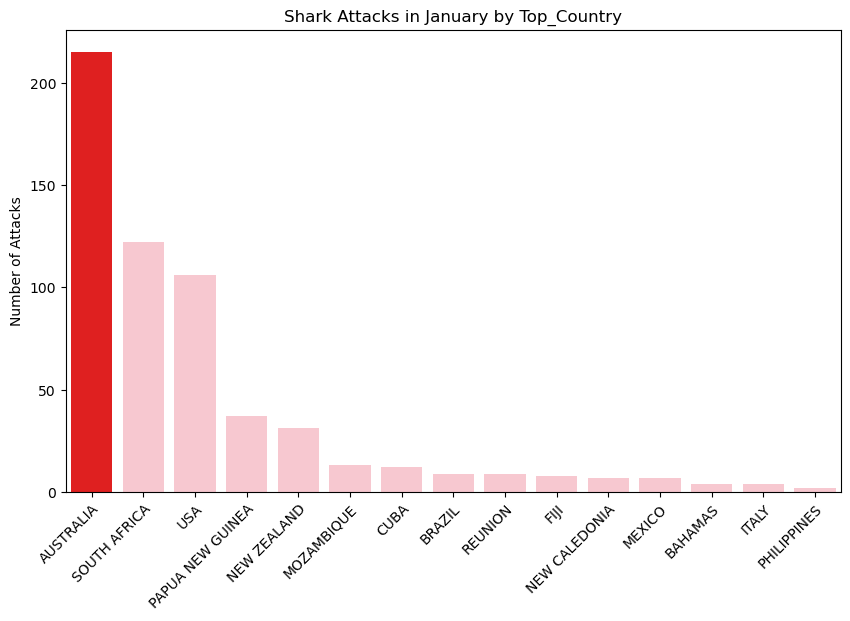

In [269]:
filtered_data = shark_df[shark_df['Month']== 'January']

most_common_Country_January= filtered_data['Top_Country'].value_counts().idxmax()

# הגדרת סדר העמודות לפי הפעילויות
order_count = filtered_data['Top_Country'].value_counts().index

# יצירת רשימת צבעים שבה כל הצבעים הם כחול, חוץ מהצבע של הפעילות עם הספירה הגבוהה ביותר שיהיה אדום
colors = ['pink' if country != most_common_Country_January else 'red' for country in order_count]

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Top_Country', order = order_count,palette = colors)
ax.set_title('Shark Attacks in January by Top_Country')
ax.set_xlabel('')
ax.set_ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor' )
plt.show()

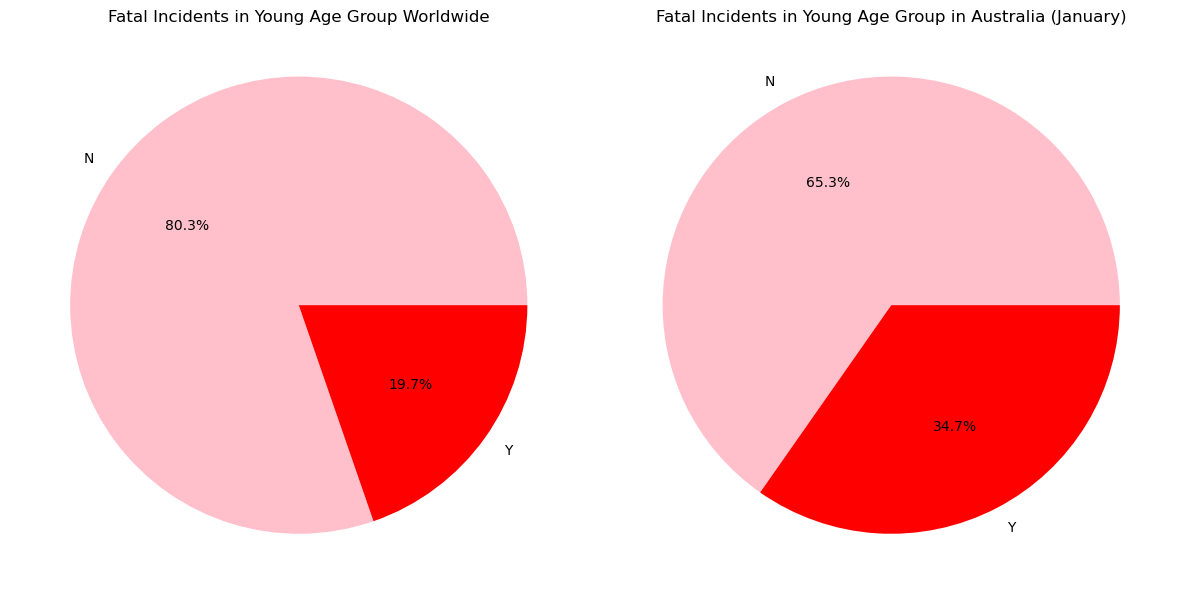

In [273]:
fatal_percent_worldwide = shark_df[shark_df['age_bins'] == 'young']['fatal_incident'].value_counts(normalize=True) * 100

# סינון לפי YOUNG, אוסטרליה וינואר וחישוב אחוז ה-FATAL
fatal_percent_australia_jan = shark_df[(shark_df['age_bins'] == 'young') &
                                       (shark_df['Top_Country'] == 'AUSTRALIA') &
                                       (shark_df['Month'] == 'January')]['fatal_incident'].value_counts(normalize=True) * 100

# יצירת תמונה עם שני גרפים פיאי
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# גרף פיאי ראשון: אחוז התקריות הקטלניות בקבוצת הגיל YOUNG בעולם
ax[0].pie(fatal_percent_worldwide, labels=fatal_percent_worldwide.index, autopct='%1.1f%%', colors=['pink', 'red'])
ax[0].set_title('Fatal Incidents in Young Age Group Worldwide')
ax[0].axis('equal')  # להפוך לעגלה

# גרף פיאי שני: אחוז התקריות הקטלניות בקבוצת הגיל YOUNG באוסטרליה בינואר
ax[1].pie(fatal_percent_australia_jan, labels=fatal_percent_australia_jan.index, autopct='%1.1f%%', colors=['pink', 'red'])
ax[1].set_title('Fatal Incidents in Young Age Group in Australia (January)')
ax[1].axis('equal')  # להפוך לעגלה

plt.tight_layout()
plt.show()

### Conclusion 2:
On one hand, the activity most commonly attacked by sharks is surfing, but on the other hand, this activity has the fewest fatal incidents.

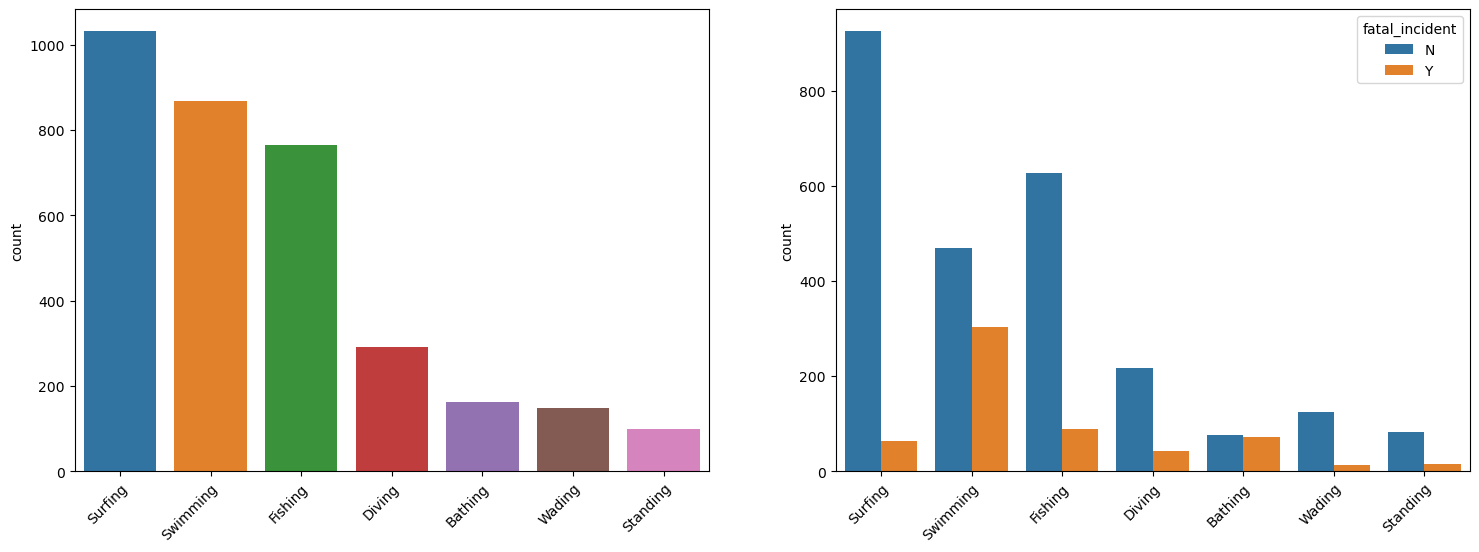

In [276]:
order_count = shark_df['Frequent_Activity'].value_counts().index
# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Percentage of Shark Attacks by Activity
sns.countplot(data=shark_df, x='Frequent_Activity', order=order_count, ax=ax[0])
sns.countplot(data=shark_df, x='Frequent_Activity',hue= 'fatal_incident',ax=ax[1],order = order_count)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')   

plt.subplots_adjust(wspace=0.2)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

plt.show()



#### In the left countplot, it can be seen that the most common activity in shark attack cases is surfing.
However,in the right countplot, it can be observed that the percentage of fatal incidents out of all shark attack cases is the lowest for surfing compared to other types of activities where attacks occur.This raises a question! 
Additionally, it can be seen that the percentage of fatal incidents for swimming activities is the highest compared to other activities

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'BRAZIL'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'BAHAMAS'),
  Text(3, 0, 'AUSTRALIA'),
  Text(4, 0, 'REUNION'),
  Text(5, 0, 'SOUTH AFRICA'),
  Text(6, 0, 'MEXICO'),
  Text(7, 0, 'NEW ZEALAND'),
  Text(8, 0, 'MOZAMBIQUE'),
  Text(9, 0, 'PHILIPPINES'),
  Text(10, 0, 'NEW CALEDONIA'),
  Text(11, 0, 'CUBA'),
  Text(12, 0, 'FIJI'),
  Text(13, 0, 'PAPUA NEW GUINEA'),
  Text(14, 0, 'ITALY')])

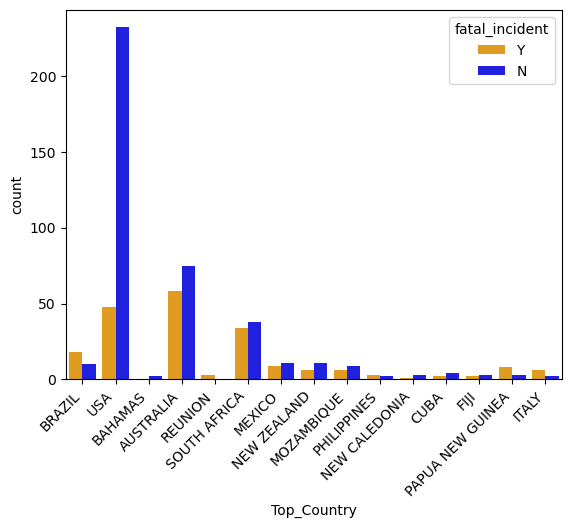

In [195]:
sns.countplot(data=shark_df[shark_df['Frequent_Activity'] == 'Swimming'],x='Top_Country',hue='fatal_incident',palette={'Y': 'orange', 'N': 'blue'})
plt.xticks(rotation=45, ha='right')


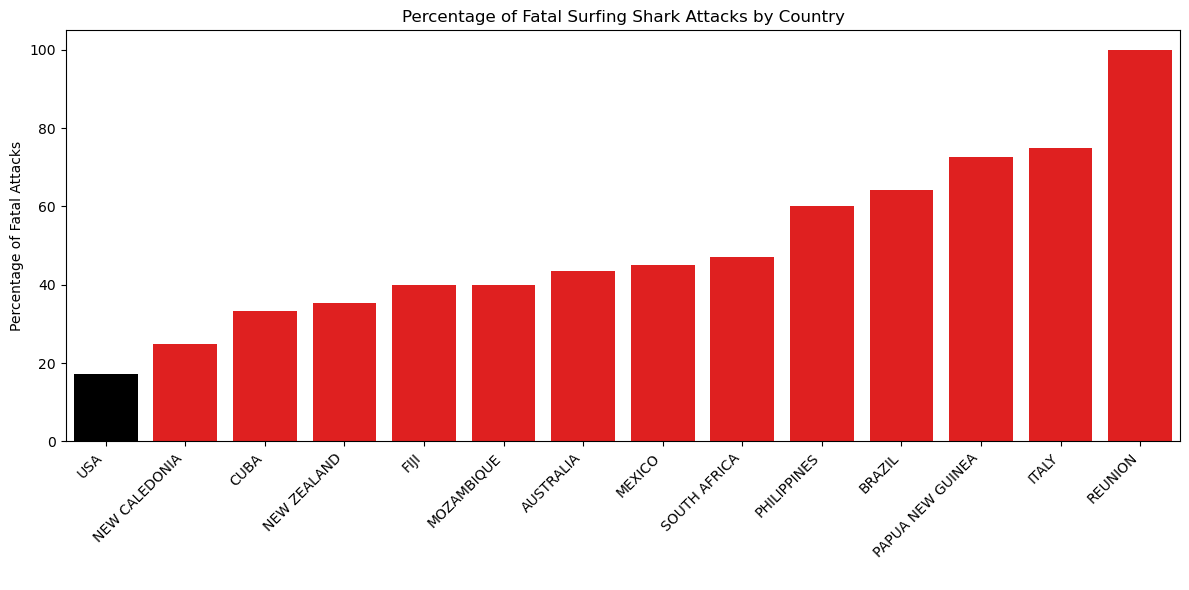

In [200]:
Swimming_df = shark_df[shark_df['Frequent_Activity'] == 'Swimming']

# חישוב כמות התקיפות לכל מדינה לפי קטגוריית קטלניות
country_fatal_counts = Swimming_df.groupby(['Top_Country', 'fatal_incident']).size().unstack(fill_value=0)

# חישוב אחוזי התקיפות הקטלניות מכלל התקיפות בכל מדינה
country_fatal_percentages = country_fatal_counts.div(country_fatal_counts.sum(axis=1), axis=0) * 100
country_fatal_percentages = country_fatal_percentages.reset_index().melt(id_vars='Top_Country', var_name='Fatal', value_name='Percentage')
country_fatal_percentages = country_fatal_percentages[country_fatal_percentages['Fatal'] == 'Y']

#להעיף את המדינות שאין להן כלל נתונים
country_fatal_percentages = country_fatal_percentages[country_fatal_percentages['Percentage'] > 0]

# מיון המדינות לפי האחוזים בסדר עולה
country_fatal_percentages = country_fatal_percentages.sort_values('Percentage')

# יצירת סדר מותאם אישית למדינות
order = country_fatal_percentages['Top_Country']

# הגדרת צבעים למדינות, כאשר המדינה עם האחוז הנמוך ביותר תקבל צבע שונה
colors = ['red'] * len(country_fatal_percentages)
colors[0] = 'black'

# יצירת גרף עמודות עם אחוזי התקיפות הקטלניות לכל מדינה
plt.figure(figsize=(12, 6))
sns.barplot(data=country_fatal_percentages, x='Top_Country', y='Percentage',palette=colors, order=order)

# הוספת כותרות לגרף
plt.title('Percentage of Fatal Surfing Shark Attacks by Country')
plt.xlabel(' ')
plt.ylabel('Percentage of Fatal Attacks')
plt.xticks(rotation=45, ha='right')

# הצגת הגרף
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'BRAZIL'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'BAHAMAS'),
  Text(3, 0, 'AUSTRALIA'),
  Text(4, 0, 'REUNION'),
  Text(5, 0, 'SOUTH AFRICA'),
  Text(6, 0, 'MEXICO'),
  Text(7, 0, 'NEW ZEALAND'),
  Text(8, 0, 'MOZAMBIQUE'),
  Text(9, 0, 'PHILIPPINES'),
  Text(10, 0, 'NEW CALEDONIA'),
  Text(11, 0, 'CUBA'),
  Text(12, 0, 'FIJI'),
  Text(13, 0, 'PAPUA NEW GUINEA'),
  Text(14, 0, 'ITALY')])

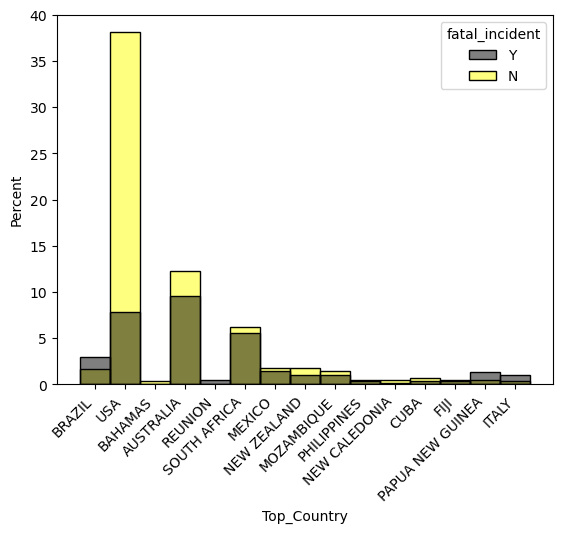

In [214]:
sns.histplot(data=Swimming_df,x='Top_Country',hue='fatal_incident',stat = 'percent',palette={'Y': 'black', 'N': 'yellow'})
plt.xticks(rotation=45, ha='right')

In [228]:
Swimming_USA_df['Month'].value_counts()

Month
July         62
August       51
June         46
September    37
May          26
April        21
October      13
January       9
November      8
February      6
March         6
December      6
Name: count, dtype: int64

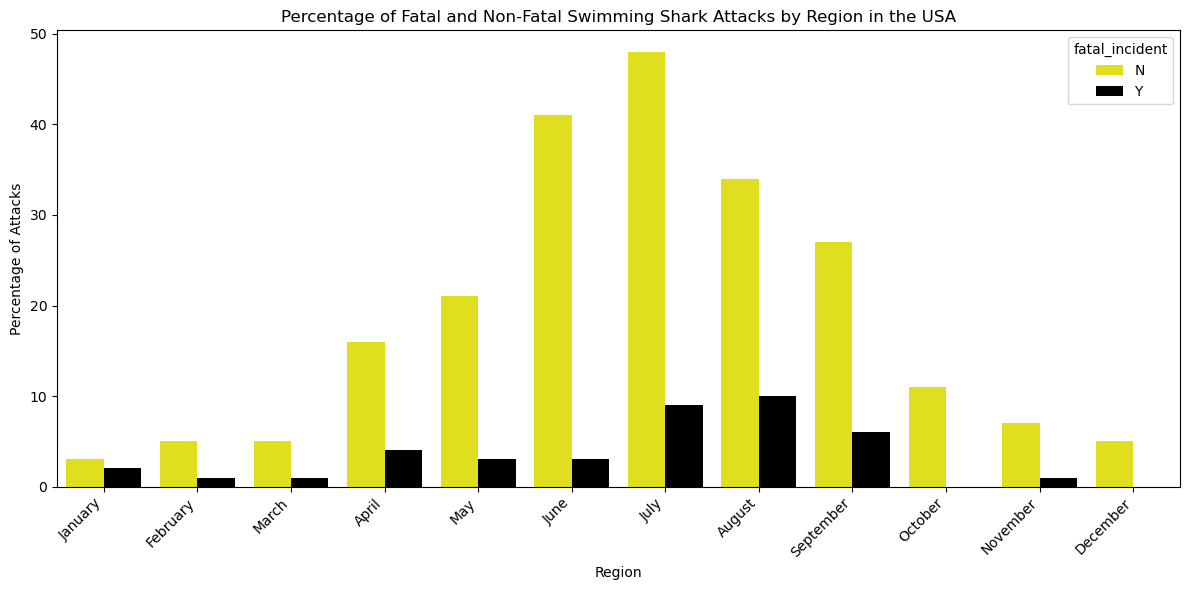

In [231]:
# סינון הנתונים לפעילות שחייה ולארה"ב בלבד
Swimming_USA_df = shark_df[(shark_df['Frequent_Activity'] == 'Swimming') & (shark_df['Top_Country'] == 'USA')]
order_time_categories = Swimming_USA_df['Month'].unique()
# Ensure order_time_categories does not contain NaNs or null values
# חישוב אחוזי התקיפות הקטלניות לכל אזור ומיון בסדר יורד
order_y = Swimming_USA_df.groupby('Time_Category')['fatal_incident'].value_counts(normalize=True).loc[:, 'Y'].sort_values(ascending=False).index

# יצירת גרף היסטוגרמה עם אחוזי התקיפות הקטלניות לפי אזור
plt.figure(figsize=(12, 6))
sns.countplot(data=Swimming_USA_df, x='Month', hue='fatal_incident', palette={'Y': 'black', 'N': 'yellow'})
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Fatal and Non-Fatal Swimming Shark Attacks by Region in the USA')
plt.xlabel('Region')
plt.ylabel('Percentage of Attacks')

# הצגת הגרף
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Percentage of Attacks')

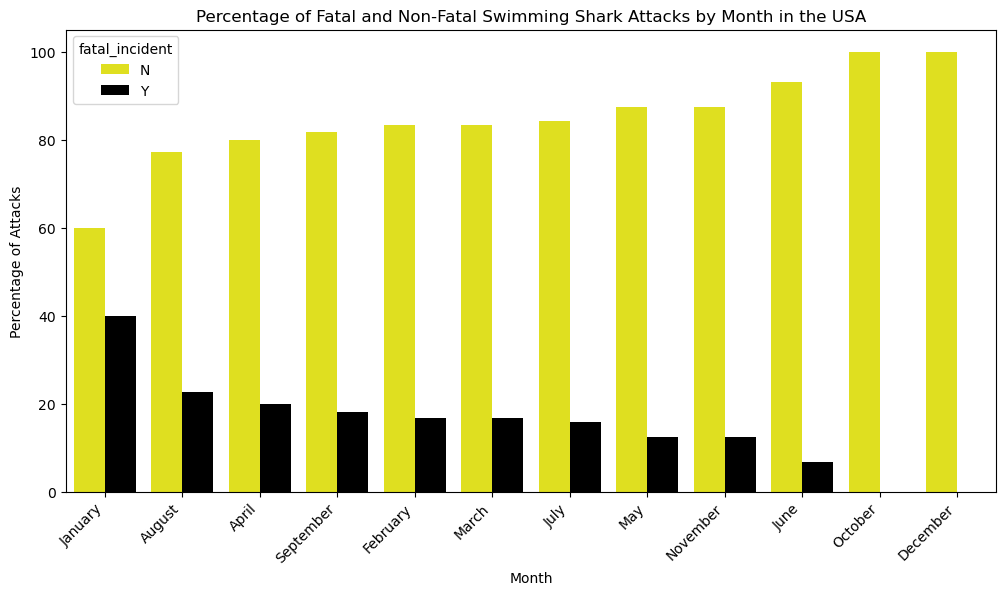

In [262]:
Swimming_USA_df = shark_df[(shark_df['Frequent_Activity'] == 'Swimming') & (shark_df['Top_Country'] == 'USA')]

# Calculate the percentage of fatal and non-fatal incidents for each month
percent_fatal_by_month = Swimming_USA_df.groupby(['Month', 'fatal_incident']).size().reset_index(name='Count')
total_counts_by_month = percent_fatal_by_month.groupby('Month')['Count'].transform('sum')

# Calculate percentages
percent_fatal_by_month['Percent'] = (percent_fatal_by_month['Count'] / total_counts_by_month) * 100
# Filter out months with no fatal incidents
months_with_fatal = percent_fatal_by_month[percent_fatal_by_month['fatal_incident'] == 'Y']['Month']
percent_fatal_by_month = percent_fatal_by_month[percent_fatal_by_month['Month'].isin(months_with_fatal)]

# Sort months by percentage of fatal incidents
if not percent_fatal_by_month.empty:
    fatal_order = percent_fatal_by_month[percent_fatal_by_month['fatal_incident'] == 'Y'].sort_values(by='Percent', ascending=False)['Month']
    percent_fatal_by_month['Month'] = pd.Categorical(percent_fatal_by_month['Month'], categories=fatal_order, ordered=True)

    # Create the palette for the barplot
    palette = {'Y': 'black', 'N': 'yellow'}

    # Check if there are any fatal months to update the palette
    if not fatal_order.empty:
        last_month = fatal_order.iloc[-1]  # Get the last month with fatal incidents
        palette_last_month = {'Y': 'red', 'N': 'orange'}
        palette.update({last_month: palette_last_month})

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=percent_fatal_by_month, x='Month', y='Percent', hue='fatal_incident', palette=palette, order=fatal_order)




# Create the barplot


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Fatal and Non-Fatal Swimming Shark Attacks by Month in the USA')
plt.xlabel('Month')
plt.ylabel('Percentage of Attacks')

Conclusion 3

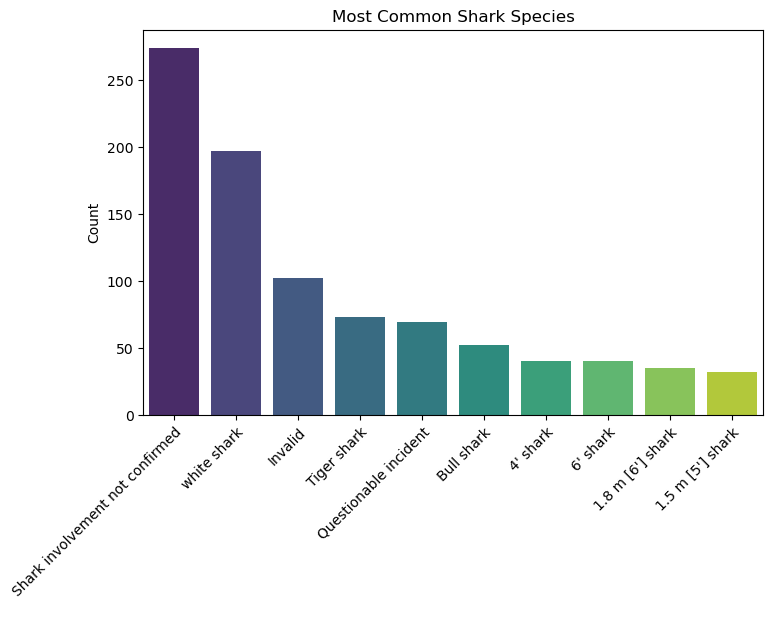

In [264]:

species_counts = shark_df['Species'].value_counts().nlargest(10)
plt.figure(figsize=(8, 5))
sns.countplot(data=shark_df[shark_df['Species'].isin(species_counts.index)], x='Species', order=species_counts.index, palette='viridis')
plt.title('Most Common Shark Species')
plt.xlabel(' ')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()


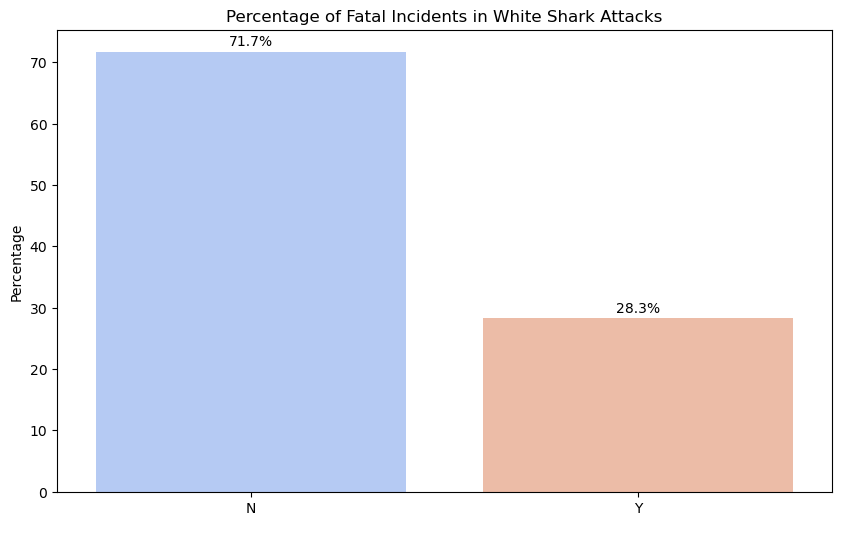

In [265]:

white_shark_data = shark_df[shark_df['Species'] == 'white shark']
fatal_incident_counts_percent = white_shark_data['fatal_incident'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=fatal_incident_counts_percent.index, y=fatal_incident_counts_percent.values, palette='coolwarm')
plt.title('Percentage of Fatal Incidents in White Shark Attacks')
plt.xlabel(' ')
plt.ylabel('Percentage')
for index, value in enumerate(fatal_incident_counts_percent.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')
plt.show()



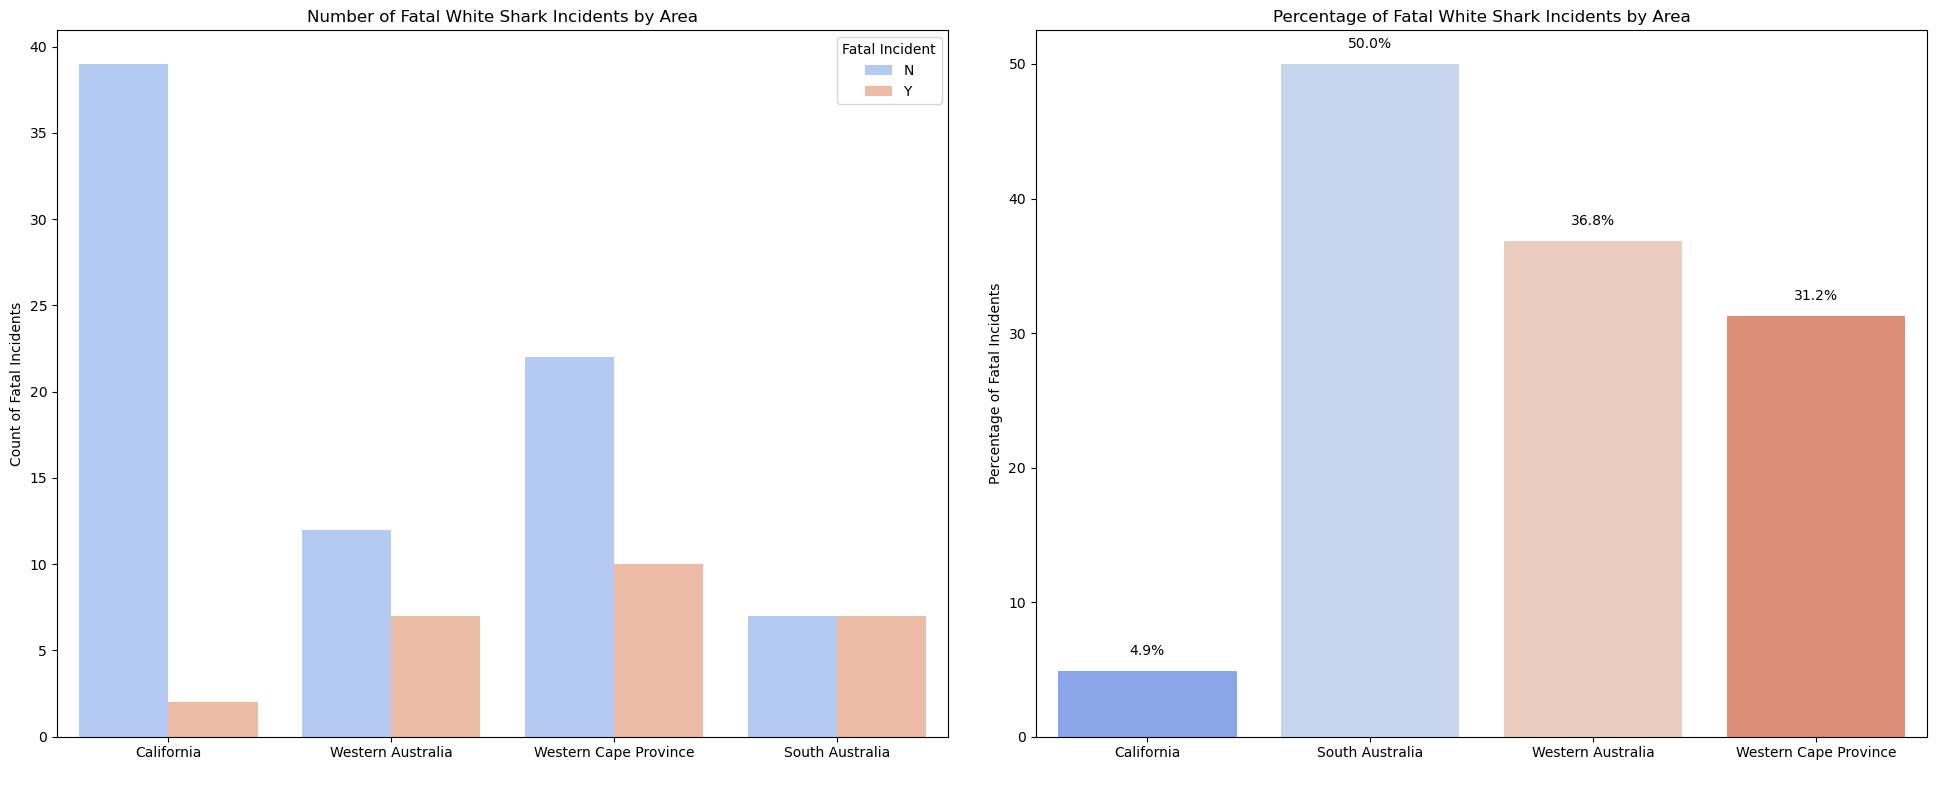

In [266]:

white_shark_data = shark_df[shark_df['Species'] == 'white shark']
area_counts = white_shark_data['Area'].value_counts()
areas_with_more_than_10_attacks = area_counts[area_counts > 10].index
filtered_white_shark_data = white_shark_data[white_shark_data['Area'].isin(areas_with_more_than_10_attacks)]
fatal_percentage_by_area = filtered_white_shark_data.groupby('Area')['fatal_incident'].value_counts(normalize=True).unstack()['Y'] * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.countplot(data=filtered_white_shark_data, x='Area', hue='fatal_incident', palette='coolwarm', ax=axes[0])
axes[0].set_title('Number of Fatal White Shark Incidents by Area')
axes[0].set_xlabel(' ')
axes[0].set_ylabel('Count of Fatal Incidents')
axes[0].legend(title='Fatal Incident', loc='upper right')

sns.barplot(x=fatal_percentage_by_area.index, y=fatal_percentage_by_area.values, palette='coolwarm', ax=axes[1])
axes[1].set_title('Percentage of Fatal White Shark Incidents by Area')
axes[1].set_xlabel(' ')
axes[1].set_ylabel('Percentage of Fatal Incidents')

for index, value in enumerate(fatal_percentage_by_area.values):
    axes[1].text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
   
plt.subplots_adjust(wspace=5)

plt.tight_layout()
plt.show()

